<a href="https://colab.research.google.com/github/NguenDuyNhat/CS114.K21/blob/master/Round3_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_csv ('/content/drive/My Drive/data2.txt', header = None)
data.columns = ['phuctap','thoigian']


In [0]:
data=pd.DataFrame(data)
data

,phuctap,thoigian
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
...,...,...
71110,4472112,0.350379
71111,5471895,0.429955
71112,9837364,0.801394
71113,9466593,0.776407


In [0]:
X=data['phuctap']
X.shape

(71115,)

In [0]:
Y=data['thoigian']
Y.shape

(71115,)

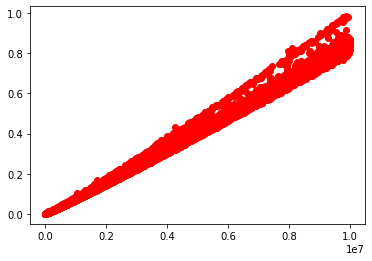

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(X, Y, 'ro')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [0]:
Xtest=pd.DataFrame(Xtest)
Xtrain=pd.DataFrame(Xtrain)
Ytest=pd.DataFrame(Ytest)
Ytrain=pd.DataFrame(Ytrain)

In [0]:
model.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Ypre=model.predict(Xtest)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytest,Ypre)

0.00014045329380082394

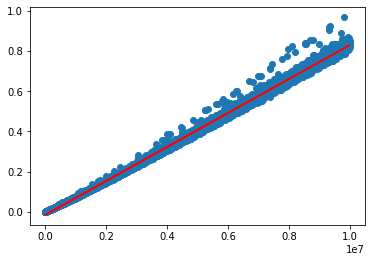

In [0]:
plt.scatter(Xtest, Ytest)
plt.plot(Xtest, Ypre, 'r')
plt.show()

In [0]:
model.score(Xtest,Ytest)

0.9976379171192907

In [0]:
pre=int(input())
pre_model=model.predict([[pre]])
if(pre_model<0):
  print("Giá trị dự đoán:",0)
else:
  print("Giá trị dự đoán:",pre_model)

66666
Giá trị dự đoán: 0


# ***Lấy model ở round 2 để predict bài ở round 3***

In [0]:
data1 = pd.read_csv ('/content/drive/My Drive/data3.txt', header = None)
data1.columns = ['phuctap','thoigian']

In [0]:
data1=pd.DataFrame(data1)
data1


,phuctap,thoigian
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831
...,...,...
10585,26872494,2.35117
10586,20753811,1.79155
10587,33520323,2.90918
10588,21243264,1.80292


In [0]:
X1=data1['phuctap']
X1.shape

(10590,)

In [0]:
Y1=data1['thoigian']
Y1.shape

(10590,)

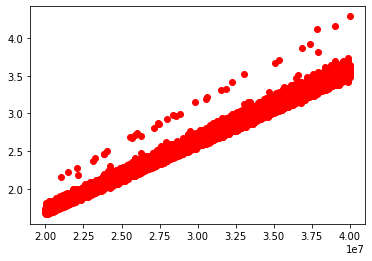

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(X1, Y1, 'ro')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split 
X1train, X1test, Y1train, Y1test = train_test_split(X1, Y1,test_size=0.2)

In [0]:
X1test=pd.DataFrame(X1test)
X1train=pd.DataFrame(X1train)
Y1test=pd.DataFrame(Y1test)
Y1train=pd.DataFrame(Y1train)

In [0]:
Y1pre=model.predict(X1test)

In [0]:
model.score(X1test,Y1test)

0.9271201249501919

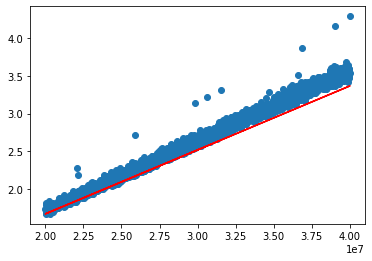

In [0]:
plt.scatter(X1test, Y1test)
plt.plot(X1test, Y1pre, 'r')
plt.show()

## ***Kết quả  tệ hơn***
## ***Vấn đề gặp phải : Underfitting. Do model không khớp với dữ liệu***


Tăng kích thước Feature

In [0]:
import numpy as np
data1['kichthuoc^2'] = data1['phuctap'] **2
data1['kichthuoc*log(kichthuoc)']=(data1['phuctap']*np.log10(data1['phuctap']))
data1.head()

,phuctap,thoigian,kichthuoc^2,kichthuoc*log(kichthuoc)
0,37837612,4.12166,1431684881862544,2.867305e+08
1,37395246,3.92089,1398404423400516,2.831873e+08
2,36610827,3.21540,1340352653623929,2.769100e+08
3,29555651,2.54506,873536506033801,2.207996e+08
4,25928216,2.21831,672272384942656,1.922259e+08


In [0]:
X2=data1[['phuctap','kichthuoc^2','kichthuoc*log(kichthuoc)']]
X2.shape
X2

,phuctap,kichthuoc^2,kichthuoc*log(kichthuoc)
0,37837612,1431684881862544,2.867305e+08
1,37395246,1398404423400516,2.831873e+08
2,36610827,1340352653623929,2.769100e+08
3,29555651,873536506033801,2.207996e+08
4,25928216,672272384942656,1.922259e+08
...,...,...,...
10585,26872494,722130933780036,1.996440e+08
10586,20753811,430720671023721,1.518577e+08
10587,33520323,1123612054024329,2.522508e+08
10588,21243264,451276265373696,1.556541e+08


In [0]:
Y2=data1['thoigian']
Y2.shape

(10590,)

In [0]:
from sklearn.model_selection import train_test_split 
X2train, X2test, Y2train, Y2test = train_test_split(X2, Y2,test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
X2test=pd.DataFrame(X2test)
X2train=pd.DataFrame(X2train)
Y2test=pd.DataFrame(Y2test)
Y2train=pd.DataFrame(Y2train)

In [0]:
model2.fit(X2train,Y2train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Ypre2=model2.predict(X2test)

In [0]:
model2.score(X2test,Y2test)

0.9878216384467498

In [0]:
pre=int(input())
pre_model=model2.predict(pd.DataFrame([pre,pre**2,pre*np.log10(pre)]).T)
print(pre_model)

6656565
[[0.49054911]]


# ***Model mới có performance cao hơn model cũ***


